# **load the dataset in a notebook and preprocess it**



In [1]:
import pandas as pd

In [2]:
# The dataset was uppload via drag-and-drop into the notebook.
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


We checked for missing values and confirmed that the dataset is clean.
Now, we can proceed with visualizing the data to answer following questions.

# **Which states have the most sales?**






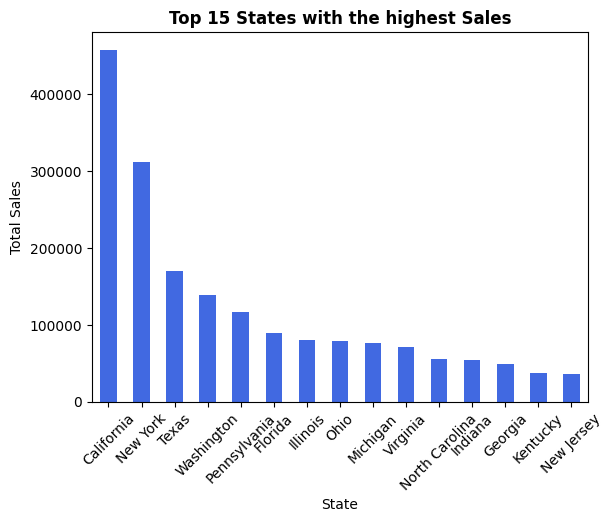

In [5]:
import matplotlib.pyplot as plt

# Group sales by state and sort in descending order
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)

# Plot the top 15 states
state_sales.head(15).plot(kind="bar", color="royalblue")

plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 15 States with the highest Sales", fontweight="bold")

plt.xticks(rotation=45)

plt.show()

# **What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)**

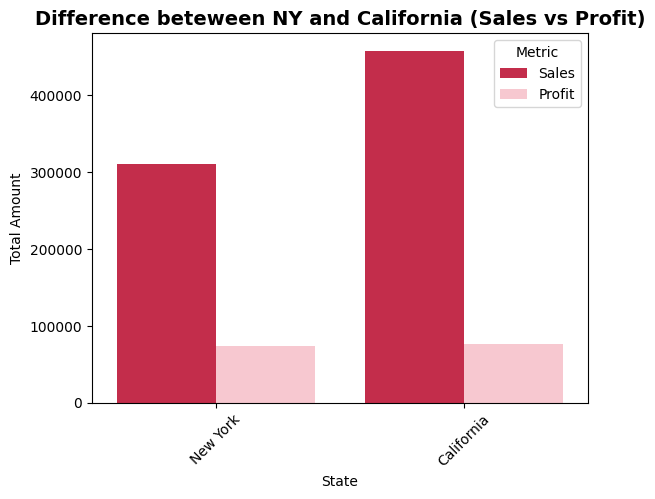

In [6]:
import seaborn as sns

ny_cal = df.groupby("State").agg({"Sales": "sum", "Profit": "sum"}).loc[["New York", "California"]]

# reset_index() transforms State into a normal column
# The "Sales" and "Profit" columns are merged into a single column called "Metric".
# Their corresponding values are stored in a new column called "Amount".
ny_cal_melted = ny_cal.reset_index().melt(id_vars="State", var_name="Metric", value_name="Amount")

sns.barplot(data=ny_cal_melted, x="State", y="Amount", hue="Metric", palette=["crimson", "pink"])

plt.title('Difference beteween NY and California (Sales vs Profit)', fontsize=14, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

plt.show()

In [7]:
df_cal = df[df['State'] == 'California']
df_ny = df[df['State'] == 'New York']

gap = df_cal['Profit'].sum() - df_ny['Profit'].sum()

if gap > 0:
    print(f"California is more profitable than New York by ${gap:,.2f}.")
elif gap < 0:
    print(f"New York is more profitable than California by ${abs(gap):,.2f}.")
else:
    print("Both states have the same total profit.")

California is more profitable than New York by $2,342.84.


# **Who is an outstanding customer in New York?**

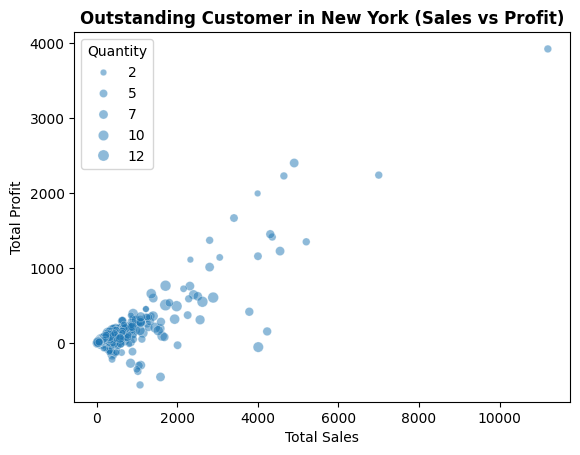

In [8]:
df_ny = df[df['State'] == 'New York']

sns.scatterplot(data=df_ny, x="Sales", y="Profit",size="Quantity", alpha=0.5)

plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.title("Outstanding Customer in New York (Sales vs Profit)", fontweight="bold")

plt.show()

Looking at the scatterplot, **one point stand out significantly above the rest** in terms of Total Sales and Total Profit.
This indicates that there is at least **one outstanding customer in New York** who has made a very high purchase and denerated exceptional profit.

In [9]:
top_customer = df_ny.nlargest(1, "Profit")
print(f"The outstanding customer in New York is {top_customer['Customer Name'].iloc[0]}, with a total sales amount of ${top_customer['Sales'].iloc[0]:,.2f} and a profit of ${top_customer['Profit'].iloc[0]:,.2f}.")


The outstanding customer in New York is Tom Ashbrook, with a total sales amount of $11,199.97 and a profit of $3,919.99.


# **Are there any differences among states in profitability?**




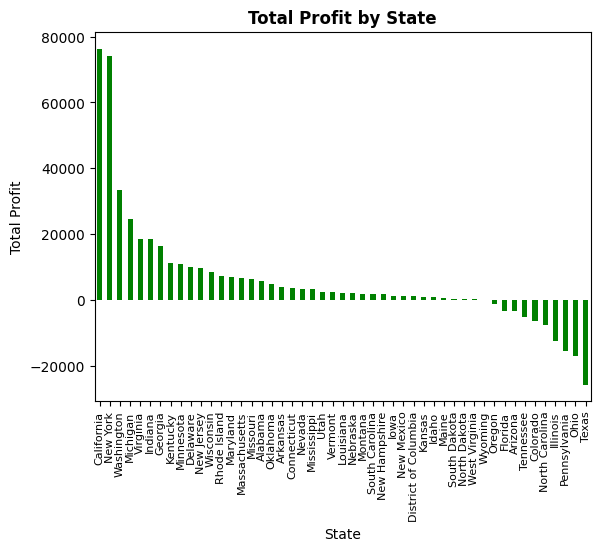

In [10]:
df_st_prf = df.groupby("State")["Profit"].sum().sort_values(ascending=False)

df_st_prf.plot(kind="bar", color="green")

plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Total Profit by State", fontweight="bold")

plt.xticks(rotation=90, fontsize=8)

plt.show()


Yes, there are significant differences in profitability among states. **California and New York** generate the **highest profits**, while several states operate at a **loss**, such as **Pennsylvania and Texas**.

# **The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto.**
It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies.
**Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)**

In [11]:
# Compute 80% of total profit per state
total_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False)
percent_80_profit = total_profit* 0.8

# Compute cumulative profit per state
customer_profit = df.groupby(["State", "Customer Name"])["Profit"].sum().sort_values(ascending=False).reset_index()

# Initialize dictionary to store Pareto analysis results
pareto_result = {}

for state in customer_profit["State"].unique():
  # Filter customers for the current state
  state_customers = customer_profit[customer_profit["State"] == state].copy()
  # Sorts customers by profit (highest to lowest)
  state_customers = state_customers.sort_values(by="Profit", ascending=False)

  # Compute cumulative profit
  state_customers["Cumulative Profit"] = state_customers["Profit"].cumsum()

  # Find how many customers contribute to 80% of the profit
  # Compute number of 'True'
  num_customers_80 = (state_customers["Cumulative Profit"] <= percent_80_profit[state]).sum()
  total_customers = len(state_customers)

  # Ensure at least 1 customer is counted
  if num_customers_80 == 0 and len(state_customers) > 0:
      num_customers_80 = 1

  pareto_result[state] = {
      "Total Customers" : total_customers,
      "Customers Needed to Reach 80% Profit" : num_customers_80,
      "Percentage of Customers" : (num_customers_80 / total_customers) * 100
  }

# Convert results to a DataFrame
pareto_df = pd.DataFrame.from_dict(pareto_result, orient="index")


In [12]:
display(pareto_df)

,Total Customers,Customers Needed to Reach 80% Profit,Percentage of Customers
Indiana,70,11,15.714286
Washington,224,43,19.196429
Delaware,43,8,18.604651
Michigan,106,26,24.528302
Minnesota,42,6,14.285714
New York,415,90,21.686747
Georgia,83,19,22.891566
Virginia,107,30,28.037383
Rhode Island,25,4,16.000000
New Jersey,61,16,26.229508


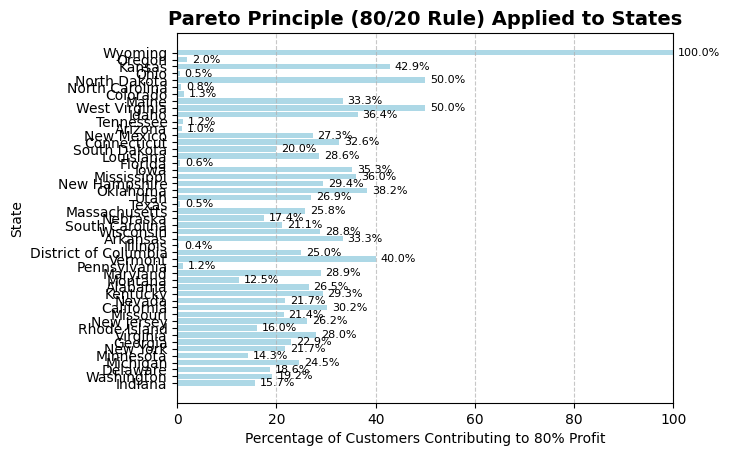

In [13]:
plt.barh(pareto_df.index, pareto_df["Percentage of Customers"], color="lightblue")

for index, value in enumerate(pareto_df["Percentage of Customers"]):
    plt.text(value + 1, index, f"{value:.1f}%", va="center", fontsize=8)

# Titles et labels
plt.xlabel("Percentage of Customers Contributing to 80% Profit")
plt.ylabel("State")
plt.title("Pareto Principle (80/20 Rule) Applied to States", fontsize=14, fontweight="bold")

plt.xlim(0, 100)  # Limit 100%
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


# **What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ?**
(Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

In [14]:
# nlargest() automatically sorts values in descending order (highest to lowest).
top_20_sales_cities = df.groupby("City")["Sales"].sum().nlargest(20)
top_20_profit_cities = df.groupby("City")["Profit"].sum().nlargest(20)

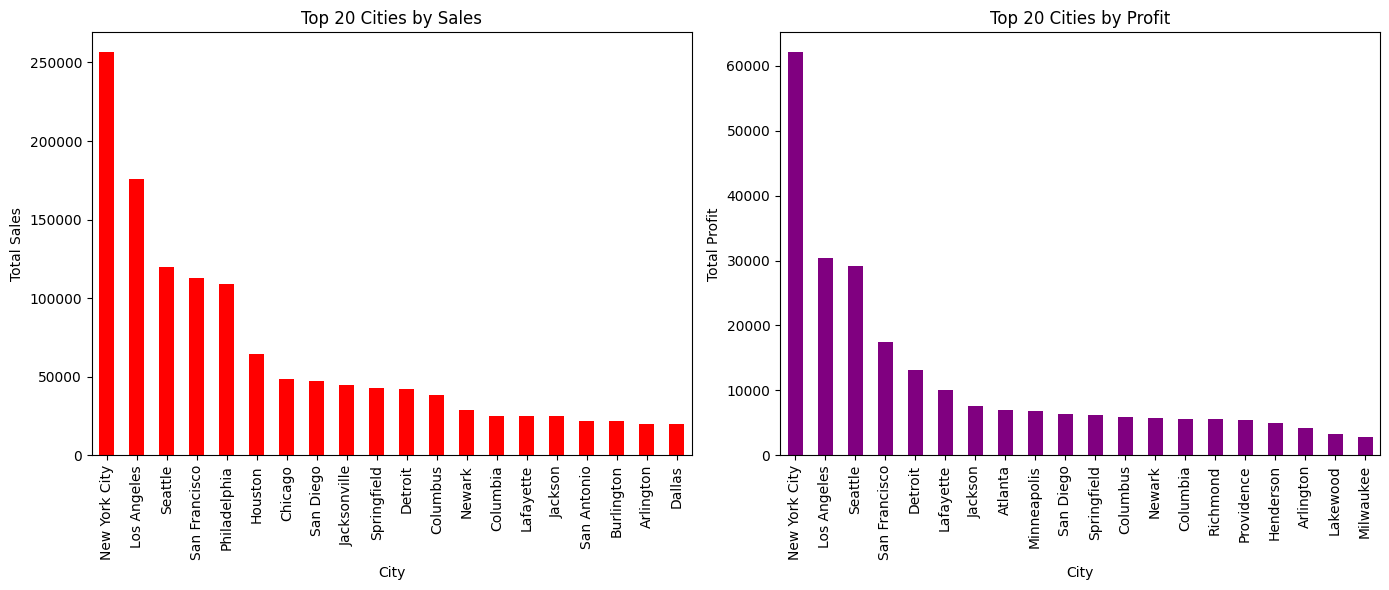

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Top 20 Cities by Sales
top_20_sales_cities.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title("Top 20 Cities by Sales")
axes[0].set_ylabel("Total Sales")
axes[0].set_xticklabels(top_20_sales_cities.index, rotation=90)

#  Top 20 Cities by Profit
top_20_profit_cities.plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title("Top 20 Cities by Profit")
axes[1].set_ylabel("Total Profit")
axes[1].set_xticklabels(top_20_profit_cities.index, rotation=90)

plt.tight_layout()
plt.show()


**Profitability = (Profit/Sales) * 100**

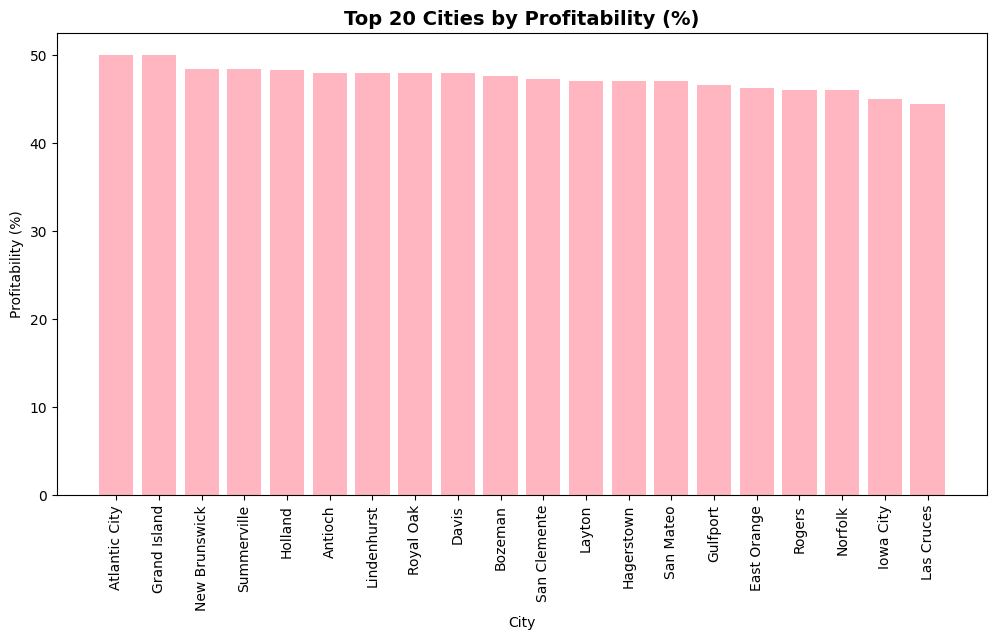

In [16]:
# Compute total sales and profit per city
city_sales_profit = df.groupby("City")[["Sales", "Profit"]].sum()

# Compute profitability for each city
city_sales_profit["Profitability (%)"] = (city_sales_profit["Profit"] / city_sales_profit["Sales"]) * 100

# Sort cities by profitability
city_sales_profit_sorted = city_sales_profit.sort_values(by="Profitability (%)", ascending=False).head(20)

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_sales_profit_sorted.index, city_sales_profit_sorted["Profitability (%)"], color="lightpink")

# Labels and title
plt.xlabel("City")
plt.ylabel("Profitability (%)")
plt.title("Top 20 Cities by Profitability (%)", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)

plt.show()


The most profitable cities (with the highest profit margins) are not the same as the highest sales cities.
Not all cities with high sales are the most profitable.
Some cities generate high sales but lower profitability.
Cities like Atlantic City, Grand Island, and New Brunswick have the highest profitability percentages, despite not being among the top-selling cities.

# **What are the Top 20 customers by Sales?**

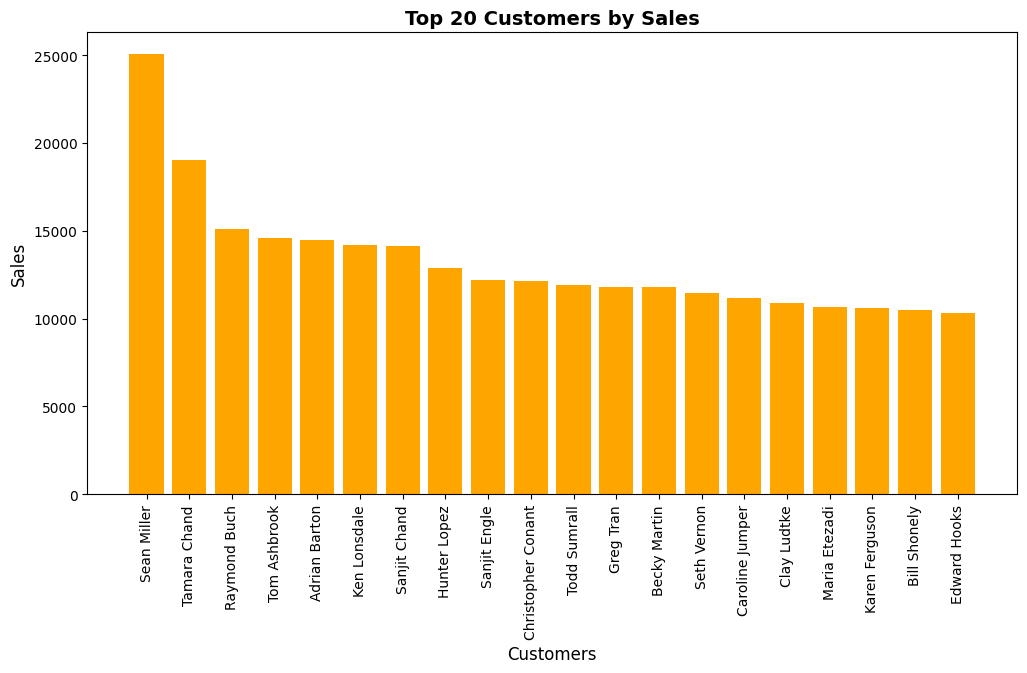

In [17]:
top_20_customers_sales = df.groupby("Customer Name")["Sales"].sum().nlargest(20)

# Bar chart
plt.figure(figsize=(12, 6))

plt.bar(top_20_customers_sales.index, top_20_customers_sales.values, color="orange")

# Labels and title
plt.xlabel("Customers", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Top 20 Customers by Sales", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)

plt.show()

# **Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?**

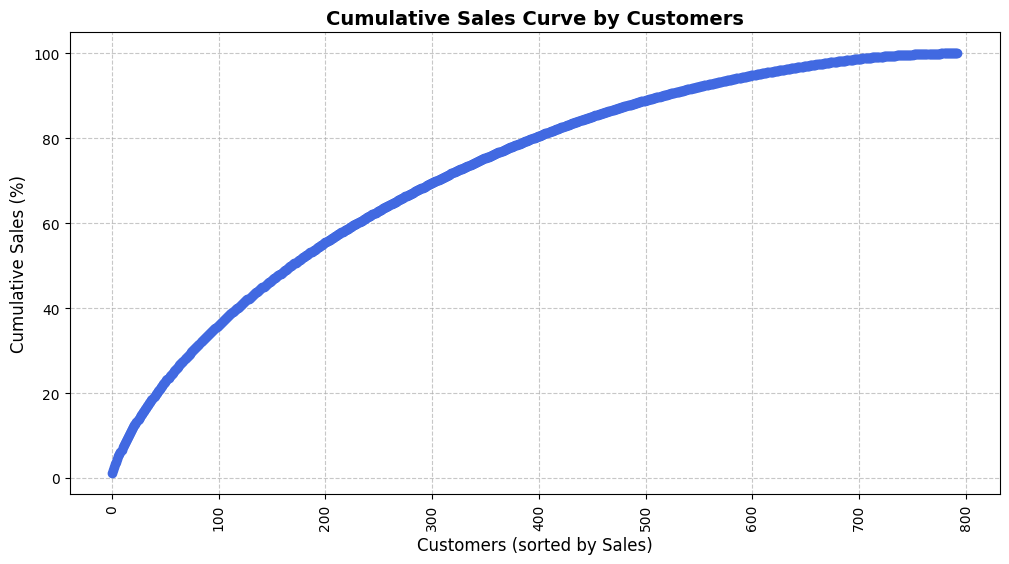

In [18]:
# Compute total sales per customer and sort in descending order
sales_by_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)

# Calculate the cumulative sum
cumulative_sales = sales_by_customers.cumsum()

# Normalize cumulative sales to percentage scale (0 to 100)
cumulative_sales_percentage = (cumulative_sales / cumulative_sales.max()) * 100

plt.figure(figsize=(12, 6))

plt.plot(range(len(cumulative_sales)), cumulative_sales_percentage, marker="o", linestyle="-", color="royalblue")

plt.xlabel("Customers (sorted by Sales)", fontsize=12)
plt.ylabel("Cumulative Sales (%)", fontsize=12)
plt.title("Cumulative Sales Curve by Customers", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [19]:
# Find 20% of total customers
total_customers = len(sales_by_customers)
top_20_percent_customers = int(total_customers * 0.2)

# Sales generated by top 20% customers
sales_by_top_20 = cumulative_sales.iloc[top_20_percent_customers]

# Percentage of total sales generated
percentage_of_sales = (sales_by_top_20 / cumulative_sales.max()) * 100

print(f"Top 20% of customers contribute to {percentage_of_sales:.2f}% of total sales.")


Top 20% of customers contribute to 48.15% of total sales.


**48.15% < 80%**.
The Pareto Principle does not hold in this dataset. Sales are more evenly spread across customer, rather than being dominated by a small group.

# **Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.**

* California, New York, and Los Angeles lead in both sales and profit.
      1. Implement loyalty programs for existing customers.
      2. Use targeted digital ads to encourage repeat purchases.
* Cities like Chicago, Philadelphia, and San Diego generate high sales but low profitability.
      1. Reduce excessive discounts to improve margins.
      2. Optimize shipping & logistics to cut costs.
      3. Analyze product profitability and focus on high-margin products.
* Most profitable cities (by percentage) include Atlantic City, Grand Island, and New Brunswick.
      1. Increase awareness via digital & local advertising.
      2. Expand distribution & availability of profitable products.
      3. Offer premium services (faster shipping, exclusive deals).
* Texas, Pennsylvania, and North Carolina have negative or very low profit.
      1. Re-evaluate pricing strategies and cut unnecessary discounts.
      2. Improve cost efficiency in logistics & fulfillment.
      3. Identify underperforming products and adjust inventory strategies.








